# Behavior Analysis of the Urban Traffic at City of Sao Paulo

In [80]:
import pandas as pd

traffic = pd.read_csv('Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv', sep=';')

## Examination of the dataset

In [81]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

In [82]:
traffic.head(5)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


Note: 
1. No missing values.
2. All data types are numerical, except "Slowness in traffic (%)" column in string format.

## Cleaning data

In [83]:
# converted "Slowness in traffic (%)" column to float
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

In [84]:
traffic.head(5)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


## Exploring data

In [85]:
# To identify what factors worsen the situation, 
# we begin by exploring the Slowness in traffic (%) column
print(traffic['Slowness in traffic (%)'].value_counts(bins=10).sort_index())

(3.379, 5.4]    16
(5.4, 7.4]      21
(7.4, 9.4]      36
(9.4, 11.4]     27
(11.4, 13.4]    11
(13.4, 15.4]     6
(15.4, 17.4]     6
(17.4, 19.4]     5
(19.4, 21.4]     3
(21.4, 23.4]     4
Name: Slowness in traffic (%), dtype: int64


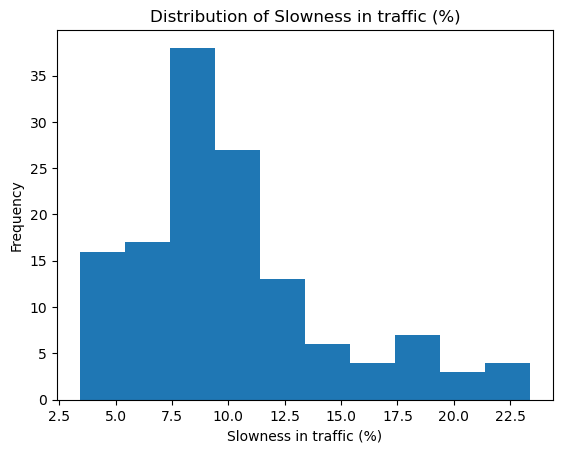

In [86]:
import matplotlib.pyplot as plt

traffic['Slowness in traffic (%)'].plot.hist()
plt.title('Distribution of Slowness in traffic (%)')
plt.xlabel('Slowness in traffic (%)')
plt.show()

Note:
1. The distribution of Slowness in traffic (%) is right skewed.
2. Most of the values pile up on the left side of the histogram, between 3%-13%

In [87]:
# sum up the total number of different incidents that happened between December 14, 2009 and December 18, 2009
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'], axis=1)
print(incidents.sum(axis=0))

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64


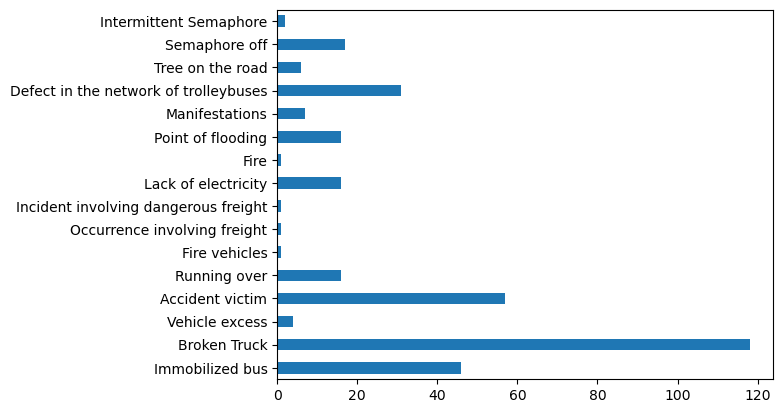

In [88]:
incidents.sum().plot.barh()
plt.show()

Note:
1. The most frequent incident type is broken trucks.

In [89]:
# get an picture about each incident type and its relationship with traffic slowness
traffic.corr()['Slowness in traffic (%)']

Hour (Coded)                             0.729962
Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64

<AxesSubplot:>

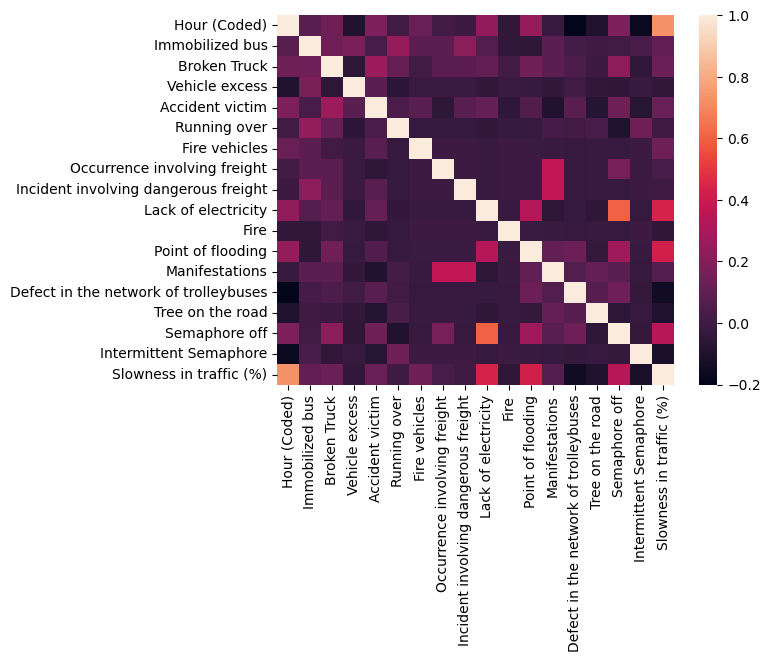

In [90]:
import seaborn as sns

sns.heatmap(traffic.corr())

Note:

1. Leaving out the Hour (Coded) column (which doesn't describe an incident type)
2. Slowness in traffic (%) correlates most strongly with the following:

a. Lack of electricity 0.44

b. Point of flooding 0.42

c. Semaphore off 0.34

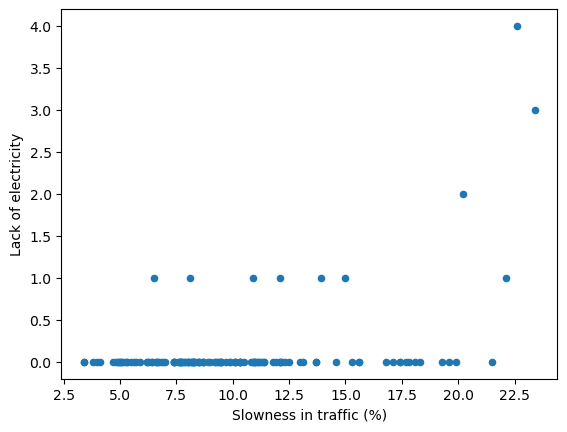

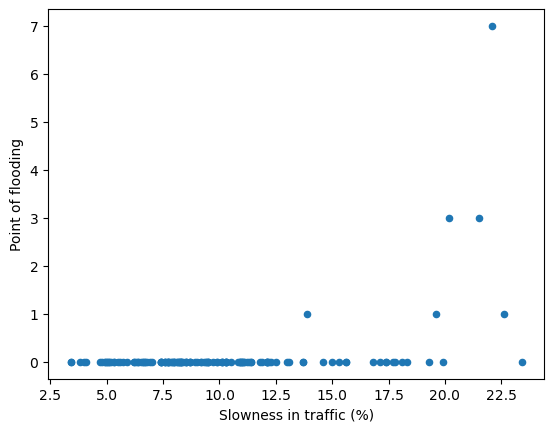

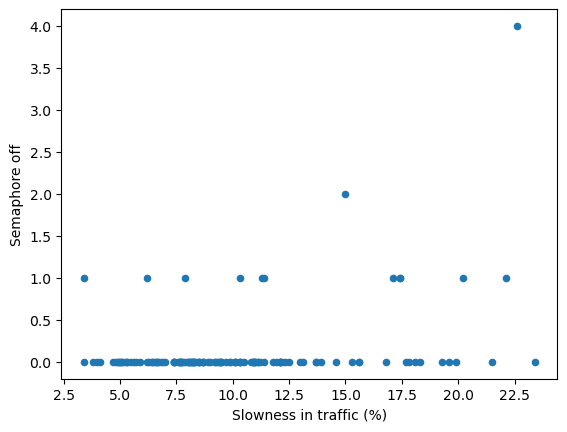

In [91]:
traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Lack of electricity')
plt.show()


traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Point of flooding')
plt.show()


traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Semaphore off')
plt.show()

Summary:

1. From the scatter plot, it seems like the positive correlation is not very obvious.
2. Therefore, we decide to isolate all the rows where traffic slowness is 20% or more.

## Taking deeper examination on specific data

In [92]:
# isolate all the rows where traffic slowness is 20% or more 
slowness_20_or_more = traffic[traffic['Slowness in traffic (%)'] > 20.0]
slowness_20_or_more = slowness_20_or_more.drop(['Slowness in traffic (%)', 'Hour (Coded)'], axis=1)

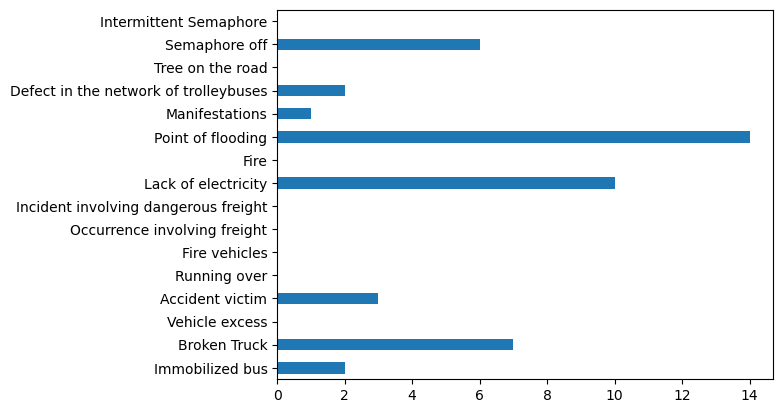

In [93]:
# calculate and visualize the incident frequency with isloated data
incident_frequencies = slowness_20_or_more.sum(axis=0)

incident_frequencies.plot.barh()
plt.show()

Note:
1. Lack of electricity and flooding are probably two factors that are causing significant traffic problems. 
2. Nonfunctional semaphores also affect traffic, but probably as a result of lack of electricity.

## Examing data through time intervals

Lastly, we try to look at in this lesson is how traffic slowness changes over the 7:00 – 20:00 time interval.

In [94]:
# create a dictionary that contains five keys: 'Monday', 'Tuesday', 'Wednesday', 'Thursday', and 'Friday'. 
# for each key, we have a DataFrame containing only the data for that specific day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    traffic_per_day[day] = traffic[i:i+27]

In [95]:
# check whether we isolate successfully
traffic_per_day['Monday'].head(3)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7


In [96]:
traffic_per_day['Monday'].tail(3)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
24,25,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11.8
25,26,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,11.4
26,27,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7.4


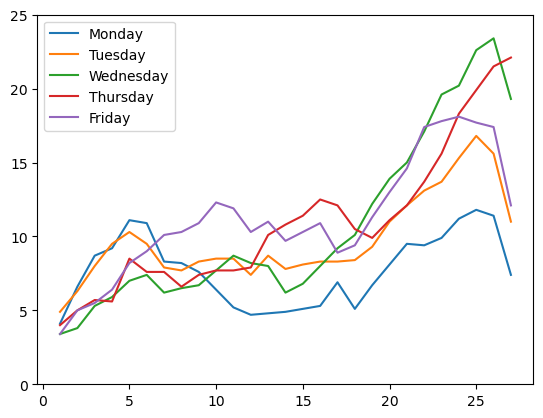

In [97]:
# visualize how the slowness in traffic change over time
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'], label=day)
    plt.ylim(0, 25)
    
plt.legend()
plt.show()

Note:
1. The slowest traffic was on Wednesday and Thursday nights between 17:00 and 20:00
2. This specific time interval also registered high slowness values on Tuesday and Friday.
3. We can reasonably presume it is beacause people are returning home from work that cause traffic slowness.

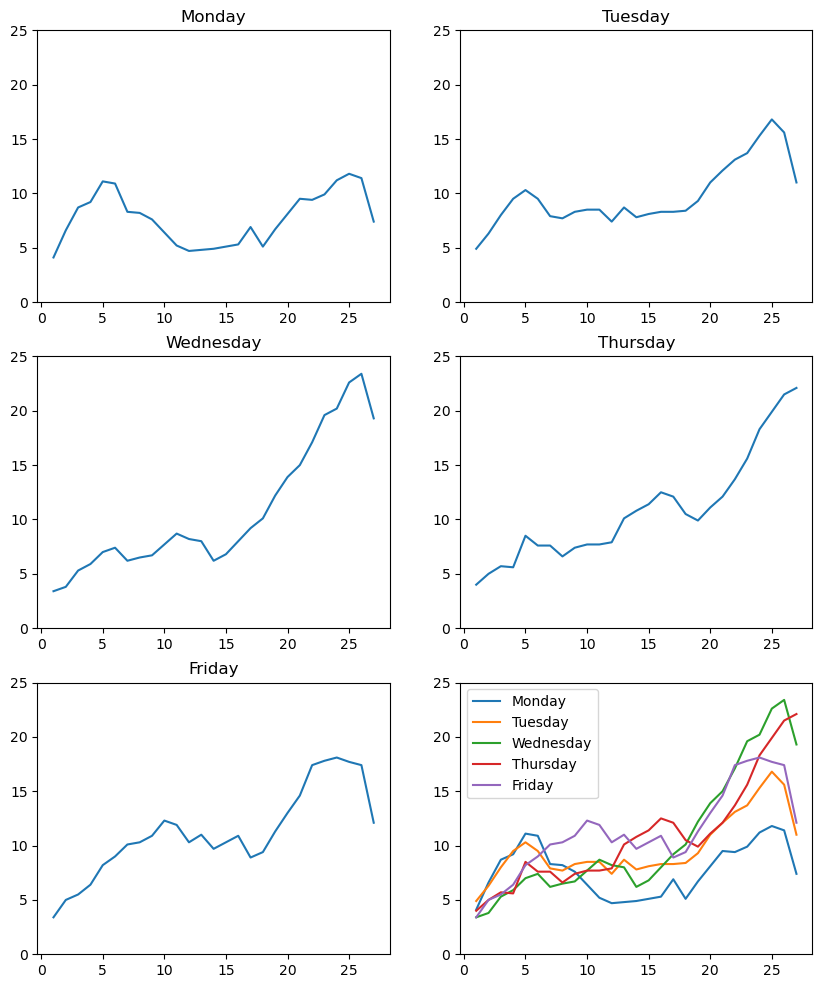

In [98]:
#  use grid chart is to ease comparison
plt.figure(figsize=(10, 12))

for i, day in zip(range(1,6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'])
    plt.ylim([0, 25])
    plt.title(day)

plt.subplot(3, 2, 6)
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'], label=day)
    plt.ylim(0, 25)
    
plt.legend()    
plt.show()
